In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import platform
X_train, Y_train = loadlocal_mnist(
            images_path=r'C:\Users\Aman\Desktop\ML_assignment_1\train-images-idx3-ubyte', 
            labels_path=r'C:\Users\Aman\Desktop\ML_assignment_1\train-labels-idx1-ubyte')
X_test, Y_test = loadlocal_mnist(
            images_path=r'C:\Users\Aman\Desktop\ML_assignment_1\t10k-images-idx3-ubyte', 
            labels_path=r'C:\Users\Aman\Desktop\ML_assignment_1\t10k-labels-idx1-ubyte')

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
#Binarizing the pixel values to 0,255
X_train=X_train>=128
X_train=X_train.astype(int)
X_train=X_train*255
X_test=X_test>=128
X_test=X_test.astype(int)
X_test=X_test*255
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
# Spliting data into test/train
df = pd.DataFrame(X_train)
df.insert(len(df.loc[0]),"Outcome",Y_train)
df1 = df[ df['Outcome'] == 1 ]
df2 = df[df['Outcome'] == 2 ]
df1=df1.append(df2)
df1 = df1.sample(frac=1).reset_index(drop=True)
Y_train=df1['Outcome']
X_train=df1.drop('Outcome',axis='columns')
Y_train=Y_train==2
Y_train=Y_train.astype(int)

df = pd.DataFrame(X_test)
df.insert(len(df.loc[0]),"Outcome",Y_test)
df1 = df[ df['Outcome'] == 1 ]
df2 = df[df['Outcome'] == 2 ]
df1=df1.append(df2)
df1 = df1.sample(frac=1).reset_index(drop=True)
Y_test=df1['Outcome']
X_test=df1.drop('Outcome',axis='columns')
Y_test=Y_test==2
Y_test=Y_test.astype(int)

X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,255,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,255,255,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,255,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,255,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,255,255,0,0,0
11997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,0,0,0,0,0,0,0,255,0,0,...,0,0,0,0,255,255,0,0,0,0


In [6]:
Y_test

0       1
1       1
2       0
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Outcome, Length: 2000, dtype: int32

In [7]:
class NaiveBayes(object):
    def gaussian_func(self, class_idx, x):     
        # calculating probability from gaussian naive bayes function (normally distributed)
        
        #Adding a very small value(epsilon) to avoid cases of zero division
        epsilon=1e-5
        
        #reading mean
        mean = self.mean[class_idx]
        
        #reading variance i.e sigma^2
        var = self.var[class_idx]
        
        numerator= np.exp( (-1 / 2) * ((x - mean) ** 2) / ( var + epsilon) )
        dinominator= np.sqrt((2 * np.pi * var )+ epsilon)
        prob = numerator / dinominator
        return prob
    
    def calc_posterior_prob(self, x):
        epsilon=1e-6
        posteriors_prob = []
        for class_idx in range(2):
            prior_prob = np.log(self.prior_prob[class_idx]) 
            conditional = np.sum(np.log(self.gaussian_func(class_idx, x)+epsilon))
            posterior_prob = prior_prob + conditional
            posteriors_prob.append(posterior_prob)
        return self.classes[np.argmax(posteriors_prob)]
    
    def fit(self, X, Y):
        # define class variables 
        self.classes = [0,1]
        self.feature_nums = X.shape[1]
        self.rows = X.shape[0]
        
        
        # calculating and storing mean, variance and convert to numpy array
        self.mean = X.groupby(Y).apply(np.mean).to_numpy()
        self.var = X.groupby(Y).apply(np.var).to_numpy() 
        
        # calculating and storing prior probabilities
        self.prior_prob = (X.groupby(Y).apply(lambda x: len(x))/self.rows).to_numpy()
    
    def predict(self, X):
        predictions=[]
        for i in X.to_numpy():
            predictions.append(self.calc_posterior_prob(i))
        return predictions
    def predict_prob(self, X):
        predictions=[]
        for i in X.to_numpy():
            predictions.append(self.calc_posterior_prob2(i))
        return predictions
    def calc_posterior_prob2(self, x):
        epsilon=1e-6
        posteriors_prob = []
        for class_idx in range(2):
            prior_prob = np.log(self.prior_prob[class_idx]) 
            conditional = np.sum(np.log(self.gaussian_func(class_idx, x)+epsilon))
            posterior_prob = prior_prob + conditional
            posteriors_prob.append(posterior_prob)
        return np.argmax(posteriors_prob)
    
model = NaiveBayes()
model.fit(X_train, Y_train)
predictions=model.predict(X_test)

Predicted    0    1
Actual             
0          979   21
1          263  737
Accuracy = 85.8 %
Precision = 97.22955145118733 %
Recall = 73.7 %
F1 score = 83.8452787258248 %

Confusion matrix is - 
Predicted    0    1
Actual             
0          979   21
1          263  737





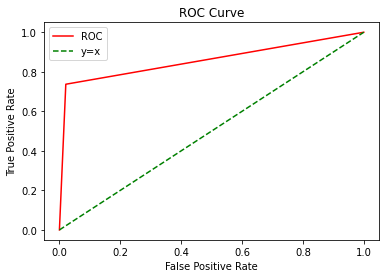

In [11]:
def conf_matrix(y_actu,y_pred):
    y_actu = pd.Series(y_actu, name='Actual')
    y_pred = pd.Series(y_pred, name='Predicted')
    confusion_matrix = pd.crosstab(y_actu, y_pred)
    print(confusion_matrix)
    tp=confusion_matrix.loc[1].at[1]
    tn=confusion_matrix.loc[0].at[0]
    fn=confusion_matrix.loc[1].at[0]
    fp=confusion_matrix.loc[0].at[1]
    accuracy=(tp+tn)/(len(Y_test))
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*precision*recall/(precision+recall)
    print('Accuracy =',accuracy*100,'%')
    print('Precision =',precision*100,'%')
    print('Recall =',recall*100,'%')
    print('F1 score =',f1_score*100,'%' )
    print('\nConfusion matrix is - ')
    print(confusion_matrix)
conf_matrix(Y_test,predictions)
print('\n\n')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_prob(X_test))
# plt.figure(figsize=(5, 5))
# plt.plot(fpr, tpr, color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='green', linestyle='dashed',label='y=x')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

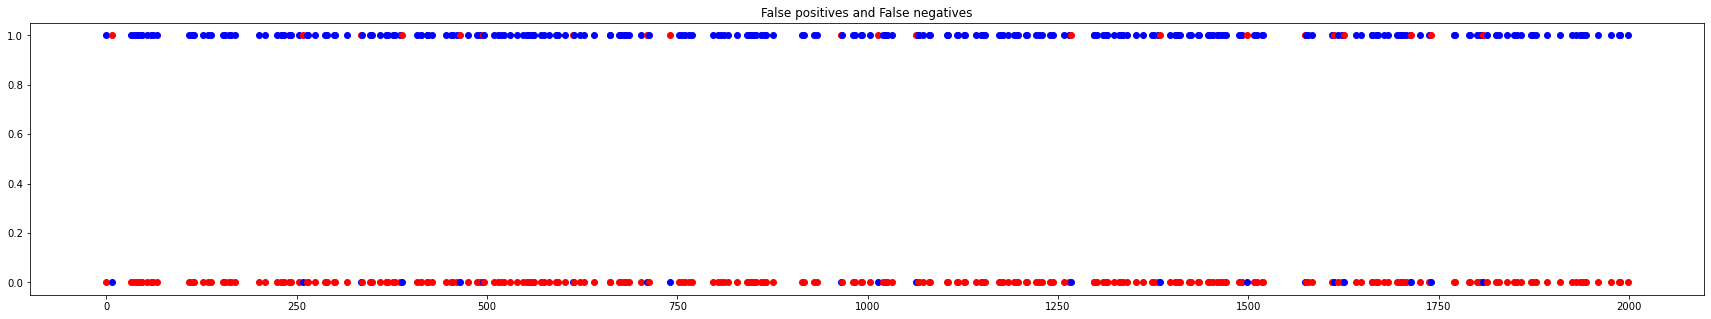

{0, 1}


In [9]:
plt.figure(figsize=(30, 5))
diff=[[],[]]
diff_index=[]
for i in range(len(predictions)):
    if(predictions[i]!=Y_test[i]):
#         diff[0].append()
        plt.scatter(i, predictions[i], color='red', label='Predictions')
        plt.scatter(i, Y_test[i], color='blue', label= 'Real')
 
plt.title('False positives and False negatives')
plt.show()
print(set(predictions))

At 1 th fold-

Confusion matrix - 
| 594 |  12 |
| 136 | 458 | 

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       606
           1       0.97      0.77      0.86       594

    accuracy                           0.88      1200
   macro avg       0.89      0.88      0.88      1200
weighted avg       0.89      0.88      0.88      1200



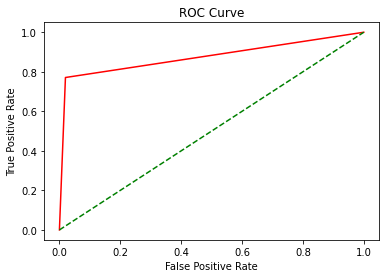




At 2 th fold-

Confusion matrix - 
| 601 |  12 |
| 135 | 452 | 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       613
           1       0.97      0.77      0.86       587

    accuracy                           0.88      1200
   macro avg       0.90      0.88      0.88      1200
weighted avg       0.89      0.88      0.88      1200



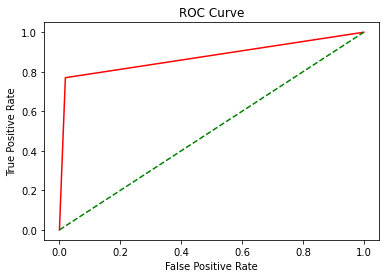




At 3 th fold-

Confusion matrix - 
| 576 |  13 |
| 139 | 472 | 

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       589
           1       0.97      0.77      0.86       611

    accuracy                           0.87      1200
   macro avg       0.89      0.88      0.87      1200
weighted avg       0.89      0.87      0.87      1200



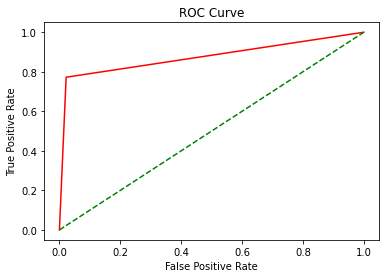




At 4 th fold-

Confusion matrix - 
| 576 |   7 |
| 171 | 446 | 

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       583
           1       0.98      0.72      0.83       617

    accuracy                           0.85      1200
   macro avg       0.88      0.86      0.85      1200
weighted avg       0.88      0.85      0.85      1200



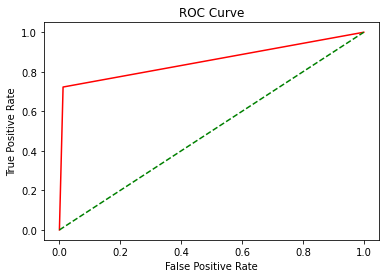




At 5 th fold-

Confusion matrix - 
| 607 |  12 |
| 139 | 442 | 

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       619
           1       0.97      0.76      0.85       581

    accuracy                           0.87      1200
   macro avg       0.89      0.87      0.87      1200
weighted avg       0.89      0.87      0.87      1200



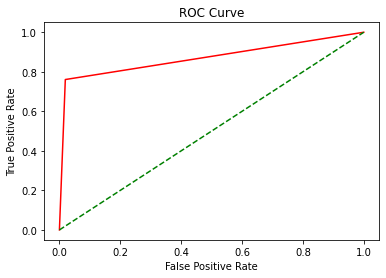




At 6 th fold-

Confusion matrix - 
| 607 |  10 |
| 162 | 421 | 

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       617
           1       0.98      0.72      0.83       583

    accuracy                           0.86      1200
   macro avg       0.88      0.85      0.85      1200
weighted avg       0.88      0.86      0.85      1200



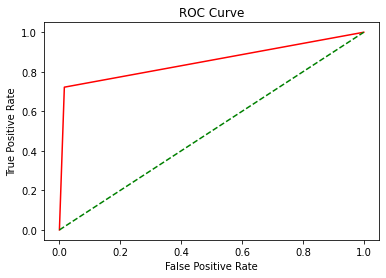




At 7 th fold-

Confusion matrix - 
| 583 |  11 |
| 146 | 460 | 

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       594
           1       0.98      0.76      0.85       606

    accuracy                           0.87      1200
   macro avg       0.89      0.87      0.87      1200
weighted avg       0.89      0.87      0.87      1200



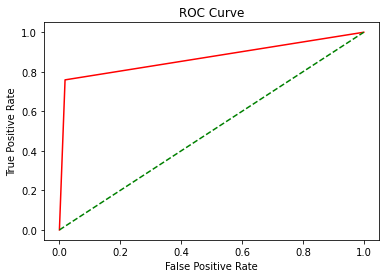




At 8 th fold-

Confusion matrix - 
| 564 |   9 |
| 156 | 471 | 

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       573
           1       0.98      0.75      0.85       627

    accuracy                           0.86      1200
   macro avg       0.88      0.87      0.86      1200
weighted avg       0.89      0.86      0.86      1200



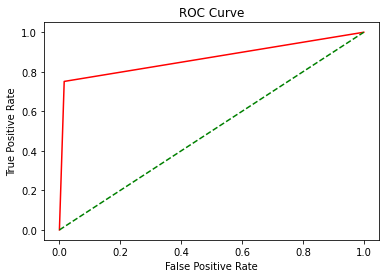




At 9 th fold-

Confusion matrix - 
| 599 |   9 |
| 154 | 438 | 

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       608
           1       0.98      0.74      0.84       592

    accuracy                           0.86      1200
   macro avg       0.89      0.86      0.86      1200
weighted avg       0.89      0.86      0.86      1200



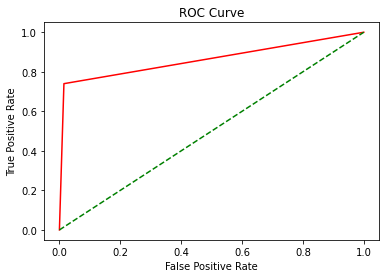




At 10 th fold-

Confusion matrix - 
| 589 |   9 |
| 160 | 442 | 

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       598
           1       0.98      0.73      0.84       602

    accuracy                           0.86      1200
   macro avg       0.88      0.86      0.86      1200
weighted avg       0.88      0.86      0.86      1200



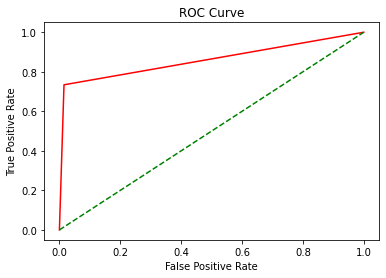

In [12]:
from sklearn import metrics
from tabulate import tabulate
K=10
for i in range(K):
    print('At',i+1,'th fold-\n')
    
    #Finding starting index
    start=(len(X_train)//K)*i
    
    #Finding ending index
    end=(len(X_train)//K)*(i+1)
    
    #Splitting traing data into validation and training data i.e creating a fold
    x_val=X_train.iloc[start:end]
    y_val=Y_train.iloc[start:end]
    x_train=X_train.drop(x_val.index)
    y_train=Y_train.drop(y_val.index)
    
    new_model = NaiveBayes()
    
    #Fitting the model
    new_model.fit(x_train, y_train)
    
    #Predicting this fld's values
    new_predictions=model.predict(x_val)
    arr = metrics.confusion_matrix(y_val, new_predictions, labels=[0,1])
    print('Confusion matrix - ')
    table = tabulate(arr, tablefmt='orgtbl')
    print(table,'\n')
    print(metrics.classification_report(y_val, new_predictions, labels=[0,1]))
    
    
    #Plotting ROC graph
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_prob(x_val))
    plt.plot(fpr, tpr, color='red')
    plt.plot([0,1], [0,1], color='green', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print("\n\n")
    new_model=1
    
    
    